# Prerequisite verification notebook

This notebook will make sure that you have all the required software installed, and that you have enough knowledge to proceed with the workshop. Note that we will not provide support for missing libraries or non-working code. It is up to you to make sure that everything works.

This notebook contains two parts. The first part "Software" will make sure that you have all the software installed and working. See the [README.md](README.md) file for more information about the setup.

The second part of this notebook is called "Knowledge." It checks whether you know what you are doing. Go through the examples, and make sure you understand what's going one. I will not be able to explain matplotlib internals during this workshop. You'll find useful links at the beginning of the second part.

Don't forget to answer the pre-workshop survey! Help me help you http://bit.ly/ds2018dataviz :-)



## 1. Software

Making sure you have the right setup

In [1]:
import sys
from matplotlib import pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
import urllib
from bidi import algorithm as bidialg # Needed to handle Hebrew in plots. Install using `pip install python-bidi`
from scipy.stats import gaussian_kde
%matplotlib inline

Let's make sure you have the right versions

In [2]:
assert sys.version_info.major > 2, "You can't be serious! It's 2018"

In [3]:
assert sys.version_info.minor >= 6, "I like f-strings and use them a lot"

In [4]:
import matplotlib
assert matplotlib.__version__ >= '2.1', f"See this page to learn why you should update your matplotlib https://matplotlib.org/users/dflt_style_changes.html"

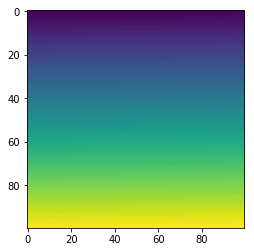

In [5]:
m = np.linspace(0, 100, 100*100).reshape(100, 100)
plt.imshow(m)

The above cell should have created a nice "heatmap" with yellow-green-blue gradient. If you can't see a graph that looks like the one below, something is wrong with your installation.

<img src="figures/heatmap.png" alt="Heatmap" style="width: 320px;"/>

In [6]:
url = 'he.wikipedia.org/wiki/הכנסת_העשרים'
tables = pd.read_html("https://" + urllib.parse.quote(url),header=0)
tbl_knesset = tables[1]
column_names = [
    'מפלגה',
    'Unused',
    'מנהיג/ה',
    'סימן',
    'מושבים',
    'אחוז המושבים',
    'Unused',
    'Unused',
    'קולות',
    'אחוז הקולות'
]
tbl_knesset = tbl_knesset.iloc[:, range(len(column_names))]
tbl_knesset.columns = column_names
tbl_knesset = tbl_knesset.drop([c for c in tbl_knesset.columns if 'Unused' in c], axis=1)
tbl_knesset = tbl_knesset.dropna(subset=['מפלגה', 'מושבים'])
tbl_knesset.head()

,מפלגה,מנהיג/ה,סימן,מושבים,אחוז המושבים,קולות,אחוז הקולות
1,הליכוד,בנימין נתניהו,מחל,30.0,25.0%,985408.0,23.4%
2,המחנה הציוני,יצחק הרצוג,אמת,24.0,20.0%,786313.0,18.67%
3,הרשימה המשותפת,איימן עודה,ודעם,13.0,10.83%,446583.0,10.61%
4,יש עתיד,יאיר לפיד,פה,11.0,9.17%,371602.0,8.82%
5,כולנו,משה כחלון,כ,10.0,8.33%,315360.0,7.49%


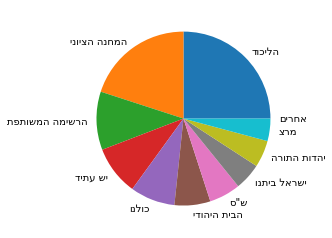

In [7]:
labels = [bidialg.get_display(l) for l in tbl_knesset['מפלגה']]
tbl_knesset['label'] = labels
fig, ax = plt.subplots()
ax.pie(
    x=tbl_knesset['מושבים'],
    labels=tbl_knesset['label']
)
ax.set_aspect(1.0)

The above cell should have created a pie chart with some Hebrew words in it, it should look like the chart below. Notice the correct text direction. You'll need [python-bidi](https://pypi.org/project/python-bidi/) for this code to work


<img src="figures/hebrew_in_a_plot.png" alt="Hebrew in a plot" style="width: 320px;"/>

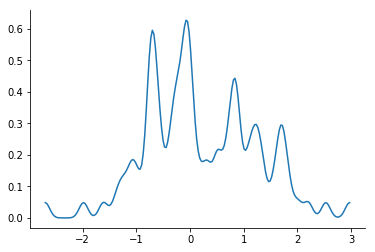

In [8]:
def kdeplot(data, ax=None, **kwargs):
    density = gaussian_kde(data)
    xs = np.linspace(np.min(data), 
                     np.max(data), 
                     kwargs.pop('numpoints', 200)
                    )
    covariance_factor = kwargs.pop(
        'covariance_factor', 0.08
    )
    density.covariance_factor = lambda : covariance_factor
    density._compute_covariance()
    if ax is None:
        fig, ax = plt.subplots()
    title = kwargs.pop('title', None)

    ax.plot(xs,density(xs), **kwargs)
    if title is not None:
        ax.set_ylabel(title, 
                      rotation=0, 
                      y=0.75, 
                      ha='right', 
                      fontsize='x-large')
    sns.despine(ax=ax)
    return ax
kdeplot(np.random.randn(100))

## 2. Knowledge
Go through the examples below. Do you understand what they do? Can you modify these examples to fit your needs? If you can't, you should do some homework **before** the workshop, or cancel your registration. Unfortunately, I won't be able to teach how to use the libraries. 

Following are useful tutorials that will give you enough background

* [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Intro to Pandas: -1 : An absolute beginners guide to Machine Learning and Data science](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Introduction to Object-oriented matplolib intefrace](http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut2.html). There are two ways to interact with matplotlib. The first one ("Matlab-style") uses a set of high-level functions. The second one is more "Pythonic" and more powerful. I will mostly use the latter.

### 2.1 Pandas

In [9]:
url = 'he.wikipedia.org/wiki/הכנסת_העשרים'
tables = pd.read_html("https://" + urllib.parse.quote(url),header=0)
tbl_knesset = tables[1]
column_names = [
    'מפלגה',
    'Unused',
    'מנהיג/ה',
    'סימן',
    'מושבים',
    'אחוז המושבים',
    'Unused',
    'Unused',
    'קולות',
    'אחוז הקולות'
]
tbl_knesset = tbl_knesset.iloc[:, range(len(column_names))]
tbl_knesset.columns = column_names
tbl_knesset = tbl_knesset.drop([c for c in tbl_knesset.columns if 'Unused' in c], axis=1)
tbl_knesset = tbl_knesset.dropna(subset=['מפלגה', 'מושבים'])
tbl_knesset.head()

,מפלגה,מנהיג/ה,סימן,מושבים,אחוז המושבים,קולות,אחוז הקולות
1,הליכוד,בנימין נתניהו,מחל,30.0,25.0%,985408.0,23.4%
2,המחנה הציוני,יצחק הרצוג,אמת,24.0,20.0%,786313.0,18.67%
3,הרשימה המשותפת,איימן עודה,ודעם,13.0,10.83%,446583.0,10.61%
4,יש עתיד,יאיר לפיד,פה,11.0,9.17%,371602.0,8.82%
5,כולנו,משה כחלון,כ,10.0,8.33%,315360.0,7.49%


### 2.2 matplotlib

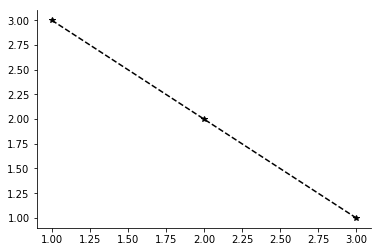

In [10]:
plt.plot([1,2,3], [3,2,1], '--*k')
sns.despine(ax=plt.gca())

Text(0.5,0.98,'Lorem ipsum')

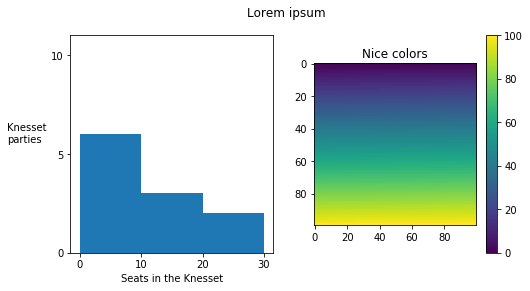

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
ax = axes[0]
ax.hist(tbl_knesset['מושבים'], bins=3)
ax.set_xlabel('Seats in the Knesset')
ax.set_ylabel('Knesset\nparties', rotation='horizontal', ha='right', ma='left')
ax.set_ylim(0, 11)
ax.set_yticks([0, 5, 10])


ax = axes[1]
heatmap = ax.imshow(m)
fig.colorbar(heatmap)
ax.set_title('Nice colors')

fig.suptitle('Lorem ipsum')